**ANALISIS LABORATORIO DE IA - DATA PREPARATION - NN**
*   Paula Andrea Caicedo Escobar
*   Wilson Daniel Escobar Silva

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#Lectura del DATA
data = pd.read_csv('cancer_mama.csv')
print(data)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

**DATA PREPARATION**

In [4]:
data = data.drop(['842302'], axis=1)
print(data)

     M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  \
0    M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
1    M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
2    M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
3    M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
4    M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089   
..  ..    ...    ...     ...     ...      ...      ...      ...      ...   
563  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
564  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
565  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
566  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
567  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   

     0.2419  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119  \
0    0.181

In [10]:
data_use = data.rename({
'M': 'Indicadores', 
'17.99': 'A',
'10.38': 'B',
'122.8': 'C', 
'1001': 'D', 
'0.1184': 'E', 
'0.2776': 'F', 
'0.3001': 'G', 
'0.1471': 'H', 
'0.2419': 'I', 
'25.38': 'J', 
'17.33': 'K', 
'184.6': 'M', 
'2019': 'N', 
'0.1622': 'Ñ', 
'0.6656': 'O', 
'0.7119': 'P', 
'0.2654': 'Q', 
'0.4601': 'R', 
'0.1189': 'S'
}, axis=1)
data_use=data_use.reindex(columns=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Indicadores"])
print(data_use)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

In [11]:
data_use['Indicadores'] = data_use['Indicadores'].replace(['M', 'B'], [1, 0])
print(data_use)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

**ANALISIS DE DATA -> DETECCION DE ATIPICOS**

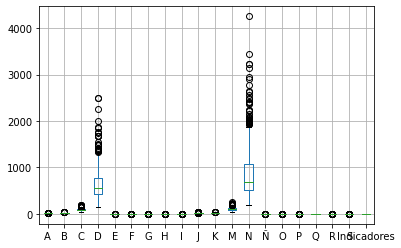

In [13]:
data_use.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Indicadores"])

In [55]:
#Copia de datos para eliminación de atipicos
data_copia = data_use.copy(deep=True)
print(type(data_copia))
print(data_copia.shape)

<class 'pandas.core.frame.DataFrame'>
(481, 20)


In [56]:
lista = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S']
print(lista)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S']


In [59]:
#ELIMINACION DE ATIPICOS
import numpy as np
print(type(data_copia))

for i in lista:
  print(i)
  print(data_copia.shape)

  q1 = np.percentile(data_copia[i], 30, interpolation  = 'midpoint')
  q3 = np.percentile(data_copia[i], 70, interpolation  = 'midpoint')

  IQR = q3-q1

  upper = np.where(data_copia[i] >= (q3 + (1.5 * IQR)))

  lower = np.where(data_copia[i] <= (q1 - (1.5 * IQR)))
 
  
  for j in upper[0]:
    #print(j)
    data_copia.drop(j, inplace = True)
  
  for j in lower[0]:
    data_copia.drop(j, inplace = True)
  

  print(data_copia.shape)
  data_copia.reset_index(drop=True, inplace=True)
  

 



<class 'pandas.core.frame.DataFrame'>
A
(206, 20)
(200, 20)
B
(200, 20)
(189, 20)
C
(189, 20)
(185, 20)
D
(185, 20)
(182, 20)
E
(182, 20)
(181, 20)
F
(181, 20)
(174, 20)
G
(174, 20)
(167, 20)
H
(167, 20)
(164, 20)
I
(164, 20)
(163, 20)
J
(163, 20)
(159, 20)
K
(159, 20)
(157, 20)
M
(157, 20)
(157, 20)
N
(157, 20)
(155, 20)
Ñ
(155, 20)
(153, 20)
O
(153, 20)
(150, 20)
P
(150, 20)
(148, 20)
Q
(148, 20)
(147, 20)
R
(147, 20)
(147, 20)
S
(147, 20)
(143, 20)


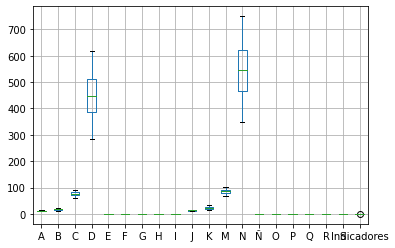

In [61]:
data_copia.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Indicadores"])

In [63]:
data_copia.corr()

,A,B,C,D,E,F,G,H,I,J,K,M,N,Ñ,O,P,Q,R,S,Indicadores
A,1.000000,-0.056262,0.997831,0.998078,-0.292056,-0.057583,0.000648,0.210355,-0.229868,0.962609,-0.049079,0.948051,0.960379,-0.357075,0.073390,0.068423,0.227213,-0.156533,-0.344918,-0.020421
B,-0.056262,1.000000,-0.050180,-0.054075,-0.009602,0.111345,0.104074,-0.106459,0.096395,-0.016097,0.869021,-0.006537,-0.015062,0.018629,0.097565,0.061971,-0.062313,0.042066,0.019343,0.036178
C,0.997831,-0.050180,1.000000,0.995081,-0.256249,0.004302,0.044944,0.243942,-0.210895,0.962465,-0.041592,0.954604,0.959316,-0.326558,0.125382,0.106708,0.261285,-0.140067,-0.315410,-0.022111
D,0.998078,-0.054075,0.995081,1.000000,-0.313389,-0.076470,-0.009633,0.196006,-0.241382,0.963402,-0.045885,0.948716,0.964660,-0.372826,0.062597,0.056019,0.210156,-0.172095,-0.346121,-0.018275
E,-0.292056,-0.009602,-0.256249,-0.313389,1.000000,0.652659,0.291711,0.499692,0.287707,-0.294801,0.008021,-0.272835,-0.313126,0.779904,0.201979,0.127058,0.329716,0.137525,0.320469,0.071037
F,-0.057583,0.111345,0.004302,-0.076470,0.652659,1.000000,0.632983,0.534050,0.287672,-0.031697,0.126357,0.050504,-0.051424,0.559375,0.746155,0.521862,0.514426,0.207980,0.477785,-0.029876
G,0.000648,0.104074,0.044944,-0.009633,0.291711,0.632983,1.000000,0.662831,0.303797,0.032961,0.127234,0.095581,0.021498,0.307131,0.601915,0.858618,0.648689,0.220366,0.252391,-0.007425
H,0.210355,-0.106459,0.243942,0.196006,0.499692,0.534050,0.662831,1.000000,0.254131,0.195195,-0.088978,0.229257,0.178651,0.397932,0.336422,0.453572,0.786610,0.099061,0.056099,0.154737
I,-0.229868,0.096395,-0.210895,-0.241382,0.287707,0.287672,0.303797,0.254131,1.000000,-0.206658,0.119129,-0.170179,-0.227009,0.251123,0.178121,0.244092,0.242509,0.687920,0.045614,-0.030674
J,0.962609,-0.016097,0.962465,0.963402,-0.294801,-0.031697,0.032961,0.195195,-0.206658,1.000000,0.015231,0.986263,0.997086,-0.296886,0.150679,0.138185,0.278121,-0.092221,-0.263824,0.007504


**ENTRENAMIENTO DEL MODELO**

In [64]:
x=data_copia[[ "A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S"]]
y=data_copia[[ "Indicadores"]]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.6)
print(len(X_train))
clf = MLPClassifier(max_iter=200).fit(X_train, y_train)
clf.score(X_test, y_test)

85


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9827586206896551